In [221]:
#import all required modules
import matplotlib
import pandas as pd
import numpy as np
from functools import reduce
from IPython.core.display import display
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import requests
import statsmodels.api as sm
import squarify
import statistics
from decimal import Decimal
import altair as alt

sns.set(rc={'figure.figsize':(20,10)})

# Data Cleaning & Wrangling
### Datasets Used:
<ol>
    <li> total-annual-new-registration-by-make.csv
    <li> average-daily-traffic-volume-entering-the-city.csv
    <li> average-speed-during-peak-hours.csv
    <li> length-of-roads-kilometres.csv
    <li> traffic-facilities.csv
    <li> vehicular-facilities.csv
    <li> annual-motor-vehicle-population-by-type-of-fuel-used.csv
    <li> Annual Fuel Data.csv
    <li> 12-Monthly Percentage Change.csv
    <li> causes-of-accidents-by-severity-of-injury-sustained.csv
    <li> Average Insurance Cost per Age Group.csv
    <li> Carpark Information API
    <li> hdb-carpark-information.csv
    <li> Results of COE Bidding Exercise.csv

# Datasets 1,2,3,14

In [222]:
pd.set_option('display.max_rows', 100)
df1 = pd.read_csv(r'./Datasets/(1) annual-new-registrations-of-cars-by-make/(1) total-annual-new-registration-by-make.csv')
df1 = df1.rename(columns = {'make':'brand','number':'number_sold'})
df21 = pd.read_csv(r'./Datasets/(1) annual-new-registrations-of-cars-by-make/(14) Results of COE Bidding Exercise.csv',thousands=',')

#### Number of null columns before cleaning

In [223]:
display(df1.isna().sum())
display(df21.isna().sum())

year           0
brand          0
number_sold    6
dtype: int64

Bidding Exercise             0
Announcement Date            0
Year                         0
Category                     0
Quota                        0
Quota Premium                0
Total Bids Received          0
Number of Successful Bids    0
dtype: int64

,max,min > 0,median,stdev
2005,31127.0,7.0,24.0,4744
2006,35326.0,5.0,34.0,5129
2007,27574.0,5.0,69.0,4452
2008,24818.0,5.0,81.0,4338
2009,17555.0,8.0,62.0,2645
2010,6927.0,5.0,51.0,1327
2011,4959.0,7.0,39.5,979
2012,5039.0,5.0,35.0,1034
2013,3871.0,6.0,14.5,846
2014,5431.0,1.0,10.0,1029


,Year,Count,Brand
0,2005,31127.0,Toyota
1,2005,17034.0,Nissan
2,2005,12860.0,Hyundai
3,2005,11274.0,Honda
4,2005,6422.0,Mitsubishi
...,...,...,...
896,2017,0.0,Toyo Ace
897,2017,0.0,Wuling
898,2017,0.0,Zotye
899,2017,0.0,Others


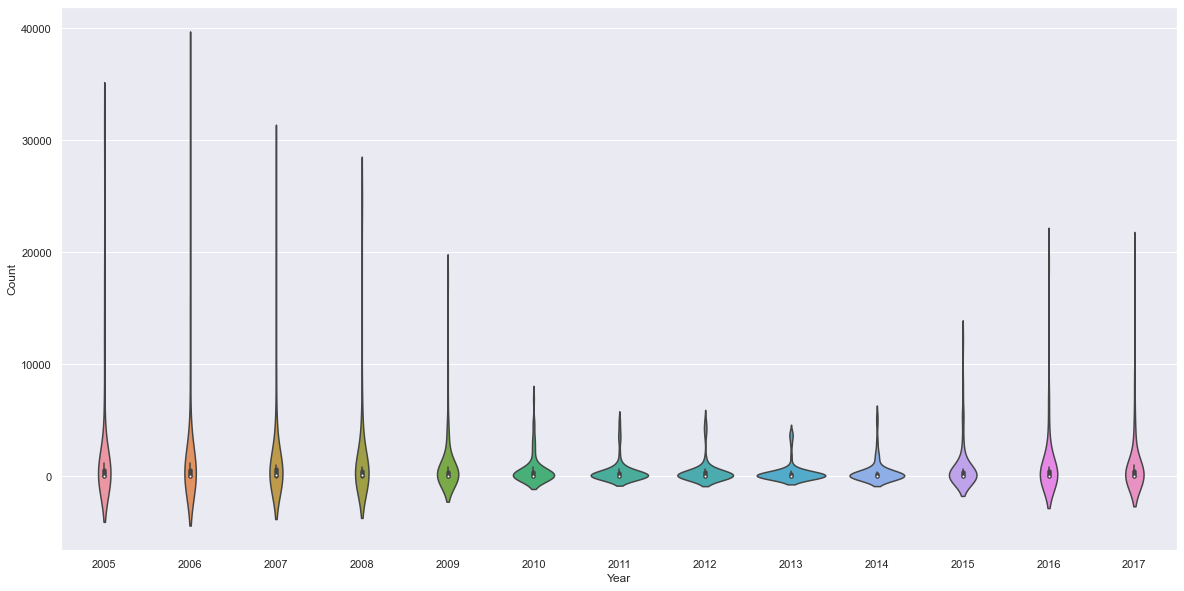

In [224]:
df1 = df1.fillna(0)
df2 = df1
df2 = df2.fillna(0)
df3 = df2.groupby('year').head(3)
df3 = df3.astype({"number_sold": int})
df3.to_csv('./Datasets/(1) cleaned.csv')



brands_total ={}
brands = np.unique(df1['brand'])

for brand in brands:
    total = np.sum(np.array((df1[df1['brand']==brand]['number_sold'])).astype(int))
    brands_total[brand] = total


brands_frame = pd.Series(brands_total)
brands_frame = brands_frame.sort_values(ascending=False)

l1 = []
l2 = []
l3 = []
stats_data ={}
years = np.unique(df1['year'])

for year in years:

    l1 = l1 +([year] * len((df1[df1['year']==year]['number_sold'])))
    l2 = l2 + (np.array(df1[df1['year']==year]['number_sold']).tolist())
    l3 = l3 + (np.array(df1[df1['year']==year]['brand']).tolist())
    m = min(i for i in np.array(df1[df1['year']==year]['number_sold']) if i > 0)
    stats_data[year] = \
        {
        'max':max((np.array(df1[df1['year']==year]['number_sold']).tolist())),
        'min > 0':m,
        'median':statistics.median((np.array(df1[df1['year']==year]['number_sold']).tolist())),
        'stdev':round(Decimal(statistics.stdev((np.array(df1[df1['year']==year]['number_sold']).tolist()))),0)
        }

year_total_dict ={'Year':l1,'Count':l2, 'Brand':l3}
year_total_df = pd.DataFrame(year_total_dict)
stats_df = pd.DataFrame(stats_data).transpose()
display(stats_df)
display(year_total_df)
stats_df.to_csv('./Datasets/Cleaned Data/(1) Stats Data per Year cleaned.csv')
year_total_df.to_csv('./Datasets/Cleaned Data/(1) Total Cars Sold Per Year Per Brand Sorted by Top cleaned.csv')
sns.violinplot(data=year_total_df, x='Year',y="Count")
plt.show()

#### Number of null columns after cleaning

In [225]:
display(df1.isna().sum())
display(df21.isna().sum())

year           0
brand          0
number_sold    0
dtype: int64

Bidding Exercise             0
Announcement Date            0
Year                         0
Category                     0
Quota                        0
Quota Premium                0
Total Bids Received          0
Number of Successful Bids    0
dtype: int64

['Quota', 'Quota Premium', 'Total Bids Received', 'Number of Successful Bids']


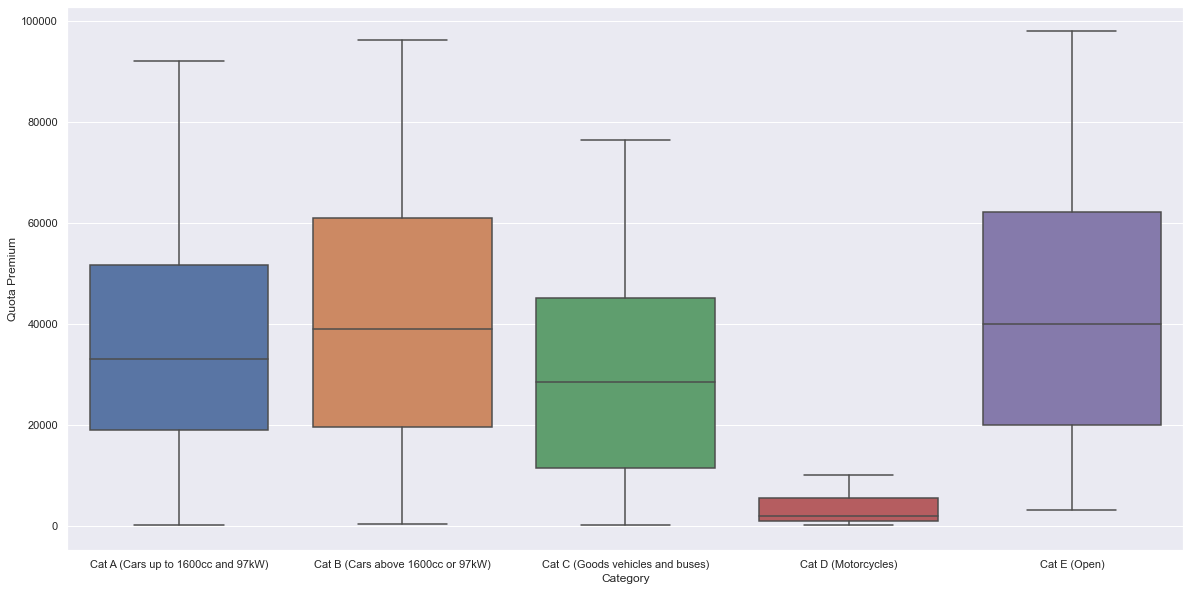

,Year,Average Premium
0,2005,11253.91
1,2006,8936.65
2,2007,10904.30
3,2008,10868.34
4,2009,10030.52
5,2010,28551.98
6,2011,42634.92
7,2012,58262.98
8,2013,59155.83
9,2014,53837.51


,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,2022,Cat A (Cars up to 1600cc and 97kW),531,57898,711,526
1,2022,Cat A (Cars up to 1600cc and 97kW),543,57599,760,533
2,2021,Cat A (Cars up to 1600cc and 97kW),534,58801,740,534
3,2021,Cat A (Cars up to 1600cc and 97kW),536,57010,771,525
4,2021,Cat A (Cars up to 1600cc and 97kW),537,55001,706,535
...,...,...,...,...,...,...
2345,2002,Cat E (Open),910,30801,1377,905
2346,2002,Cat E (Open),1097,27999,1663,1083
2347,2002,Cat E (Open),1095,28005,1445,1094
2348,2002,Cat E (Open),1105,28487,1477,1101


Cat A (Cars up to 1600cc and 97kW)
Cat B (Cars above 1600cc or 97kW)
Cat C (Goods vehicles and buses)
Cat D (Motorcycles)
Cat E (Open)


,Cat A (Cars up to 1600cc and 97kW),Cat B (Cars above 1600cc or 97kW),Cat C (Goods vehicles and buses),Cat D (Motorcycles),Cat E (Open)
0,74.0,64.3,61.1,77.1,64.2
1,70.1,82.3,43.9,74.9,77.2
2,72.2,71.2,59.3,75.1,73.4
3,68.1,72.1,63.3,68.5,59.2
4,75.8,73.4,55.5,71.3,52.6
...,...,...,...,...,...
465,68.3,64.8,79.4,91.4,65.7
466,78.1,76.6,80.4,93.4,65.1
467,68.4,67.9,77.0,100.0,75.7
468,71.4,75.3,73.2,96.8,74.5


Standard Deviation for COE Premiums and Bid Success Rate:


,Category,Premium Standard Deviation,Success Rate Standard Dev
0,Cat A (Cars up to 1600cc and 97kW),"$20,011.51",12.9
1,Cat B (Cars above 1600cc or 97kW),"$24,022.49",11.2
2,Cat C (Goods vehicles and buses),"$18,438.91",11.9
3,Cat D (Motorcycles),"$2,673.49",10.8
4,Cat E (Open),"$24,282.03",8.7


In [226]:
df21['Quota Premium'] =df21['Quota Premium'].replace({'\$': '', ',': ''}, regex=True) #clean data using regex and replace functions to remove currency formatting
df21 = df21.drop(['Bidding Exercise', 'Announcement Date'], axis=1)
df21 = df21.set_index(['Year', 'Category'])
cols = df21.columns.tolist()
print(cols)



df21['Quota Premium'] = df21['Quota Premium'].astype(int)
df21 = df21.reset_index()
g = sns.boxplot(x='Category', y='Quota Premium',
               data=df21)
plt.show()

categories = np.unique(df21['Category'])
df21_years = np.unique(df21['Year'])
year_dict ={}

for year in df21_years:
    if 2004 < year < 2018:
        premium = round(np.average(np.array(df21[df21['Year']==year]['Quota Premium'])),2)
        year_dict[year] = premium

year_dict = pd.Series(year_dict)
year_dict = pd.DataFrame({'Year':year_dict.index,'Average Premium':year_dict.values})
display(year_dict)
year_dict.to_csv('./Datasets/Cleaned Data/(14) COE Premiums Over The Years.csv')

success_rate ={}
premium_dev ={}
premium_dev_currency = {}
cat_premium ={}
display(df21)
for category in categories:
    print(category)
    list_values = []
    list_values_percentage = []

    success = np.array(df21[df21['Category']==category]['Number of Successful Bids'])
    total = np.array((df21[df21['Category']==category]['Total Bids Received']))

    for x,y in zip(success,total):
        list_values.append(round((x/y*100),1))

    success_rate[category]=list_values
    premium_dev[category]=round(df21[df21['Category']==category]['Quota Premium'].std(),2)
    premium_dev_currency[category]="${:,.2f}". format(round(df21[df21['Category']==category]['Quota Premium'].std(),2))


percentage_stacked_df = pd.DataFrame(success_rate)
premium_dev_currency = pd.Series(premium_dev_currency)
premium_dev = pd.Series(premium_dev)
success_rate = round(percentage_stacked_df.std(),1)
display(percentage_stacked_df)
comb_df = pd.DataFrame({'Category':premium_dev_currency.index,'Premium Standard Deviation':premium_dev_currency.values,'Success Rate Standard Dev':success_rate.values})
print('Standard Deviation for COE Premiums and Bid Success Rate:')
display(comb_df)
df21.to_csv('./Datasets/Cleaned Data/(14) All Combined cleaned.csv')
percentage_stacked_df.to_csv('./Datasets/Cleaned Data/(14) Bid Success Rate All Years cleaned.csv')
premium_dev.to_csv('./Datasets/Cleaned Data/(14) COE Premium Standard Deviation cleaned.csv')
success_rate.to_csv('./Datasets/Cleaned Data/(14) Bid Success Rate Standard Deviation cleaned.csv')
comb_df.to_csv('./Datasets/Cleaned Data/(14) Combined Standard Deviation for COE Premiums and Bid Success Rate cleaned.csv')

plt.show()


In [227]:
display(df3.set_index(['year','brand']))
unique_values = df1['year'].unique()

df4 = df3.reset_index()

mean_values = [[i] for i in unique_values]

i=0

for year in mean_values:
    mean_values[i].append(int(round(df4.loc[df4['year']==unique_values[i]]['number_sold'].sum())))
    i = i+1


df5 = pd.DataFrame(data=mean_values,columns=['Year','Total Number of Cars Sold'])

df6 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(3) average-speed-during-peak-hours.csv')
df7 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(2) average-daily-traffic-volume-entering-the-city.csv')
df7.to_csv('./Datasets/(2) cleaned.csv')
df6.to_csv('./Datasets/(3) cleaned.csv')

df6 = df6.rename(columns={'ave_speed_expressway':'Average Expressway Speed','ave_speed_arterial_roads':'Average Arterial Roads Speed','year':'Year'})
df7 = df7.rename(columns={'ave_daily_traffic_volume_entering_city':'Average Traffic Volume Entering City','year':'Year'})
df_list = [df5,df6,df7]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Year'), df_list) #merge data using lambda function
df_final.to_csv('./Datasets/Cleaned Data/(1,2,3) cleaned.csv')
display(df_final)



number_sold
year brand                     
2005 Toyota               31127
     Nissan               17034
     Hyundai              12860
2006 Toyota               35326
     Honda                14964
     Nissan               14768
2007 Toyota               27574
     Honda                21215
     Nissan                9625
2008 Toyota               24818
     Honda                24591
     Mitsubishi            6862
2009 Toyota               17555
     Honda                 9584
     Hyundai               6639
2010 Toyota                6927
     B.M.W.                4708
     Mercedes Benz         4705
2011 B.M.W.                4959
     Mercedes Benz         4166
     Toyota                3562
2012 B.M.W.                5039
     Mercedes Benz         4323
     Toyota                4272
2013 Mercedes Benz         3871
     B.M.W.                3730
     Toyota                3459
2014 Toyota                5431
     Mercedes Benz         4651
     B.M.W.                3239
2015 Toyota               12171
     Honda                 7916
     Nissan                5574
2016 Honda                19349
     Toyota               18491
     Mazda                 7091
2017 Toyota               19133
     Honda                16013
     Mazda                 8509

,Year,Total Number of Cars Sold,Average Expressway Speed,Average Arterial Roads Speed,Average Traffic Volume Entering City
0,2005,61021,63.0,27.2,244000
1,2006,65058,61.6,27.1,270400
2,2007,58414,62.4,26.9,278300
3,2008,56271,63.3,26.7,278100
4,2009,33778,62.0,27.9,278400
5,2010,16340,62.3,28.0,293300
6,2011,12687,62.5,28.5,300000
7,2012,13634,63.1,28.6,292000
8,2013,11060,61.4,28.9,289000
9,2014,13321,64.1,28.9,300400


# Dataset 4

In [228]:
df8 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(4) length-of-roads-kilometres.csv')
df8 = df8.rename(columns={'year':'Year','road_type':'Road Type','road_length':'Road Length'})
df8.to_csv('./Datasets/Cleaned Data/(4) cleaned.csv')

#### Number of null columns before cleaning

In [229]:
display(df8.isna().sum())


Year           0
Road Type      0
Road Length    0
dtype: int64

In [230]:
display(df8)

,Year,Road Type,Road Length
0,2005,Local Road,2036
1,2005,Arterial Road,594
2,2005,Collector Road,455
3,2005,Expressway,150
4,2006,Local Road,2040
5,2006,Arterial Road,604
6,2006,Collector Road,468
7,2006,Expressway,150
8,2007,Local Road,2042
9,2007,Arterial Road,613


### Handling Total Data


In [231]:
total_road_length_keys = (np.unique(df8["Year"]))
total_road_length_values =[]
for year in np.unique(df8["Year"]):
    total_road_length_values.append(df8[df8["Year"]==year]["Road Length"].sum())


total_road_length = dict(zip(total_road_length_keys, total_road_length_values))
df8_total = pd.Series(data=total_road_length, index=np.unique(df8["Year"]))
df8 = df8.set_index(['Year','Road Type'])
df8_total = df8_total.to_frame().reset_index()
df8_total = df8_total.rename(columns={0:'Total','index':'Year'})
df8_total.to_csv('./Datasets/Cleaned Data/(4) total_cleaned.csv')
display(df8_total)
#check data fit
stockModel = sm.OLS.from_formula("Total ~ 	Year", data=df8_total).fit()
stockPredicts = stockModel.predict()

df8 = df8.reset_index()
years = np.unique(df8["Year"])
road_type = np.unique(df8["Road Type"])
year_cat ={}
for year in years:
    print(year)
    keys = (np.array(df8[df8["Year"]==year]['Road Type']))
    values = (np.array(df8[df8["Year"]==year]['Road Length']))
    year_cat[year] = dict(zip(keys,values))

print(year_cat)
year_cat_df = pd.DataFrame.from_dict(year_cat).transpose()
display(year_cat_df)
year_cat_df.to_csv('./Datasets/Cleaned Data/(4) Cat Values sorted by Year cleaned.csv')

,Year,Total
0,2005,3235
1,2006,3262
2,2007,3297
3,2008,3325
4,2009,3355
5,2010,3356
6,2011,3411
7,2012,3425
8,2013,3452
9,2014,3495


2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
{2005: {'Local Road': 2036, 'Arterial Road': 594, 'Collector Road': 455, 'Expressway': 150}, 2006: {'Local Road': 2040, 'Arterial Road': 604, 'Collector Road': 468, 'Expressway': 150}, 2007: {'Local Road': 2042, 'Arterial Road': 613, 'Collector Road': 489, 'Expressway': 153}, 2008: {'Local Road': 2043, 'Arterial Road': 621, 'Collector Road': 500, 'Expressway': 161}, 2009: {'Local Road': 2046, 'Arterial Road': 627, 'Collector Road': 521, 'Expressway': 161}, 2010: {'Local Road': 2047, 'Arterial Road': 627, 'Collector Road': 521, 'Expressway': 161}, 2011: {'Local Road': 2048, 'Arterial Road': 645, 'Collector Road': 557, 'Expressway': 161}, 2012: {'Local Road': 2051, 'Arterial Road': 652, 'Collector Road': 561, 'Expressway': 161}, 2013: {'Local Road': 2055, 'Arterial Road': 662, 'Collector Road': 571, 'Expressway': 164}, 2014: {'Local Road': 2055, 'Arterial Road': 698, 'Collector Road': 578, 'Expressway': 164}, 2015: {'Local 

,Local Road,Arterial Road,Collector Road,Expressway
2005,2036,594,455,150
2006,2040,604,468,150
2007,2042,613,489,153
2008,2043,621,500,161
2009,2046,627,521,161
2010,2047,627,521,161
2011,2048,645,557,161
2012,2051,652,561,161
2013,2055,662,571,164
2014,2055,698,578,164


#### 96.9% R<sup>2</sup> value

Intercept   -45499.587912
Year            24.313187
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     341.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.24e-09
Time:                        20:23:32   Log-Likelihood:                -54.751
No. Observations:                  13   AIC:                             113.5
Df Residuals:                      11   BIC:                             114.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\justi\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


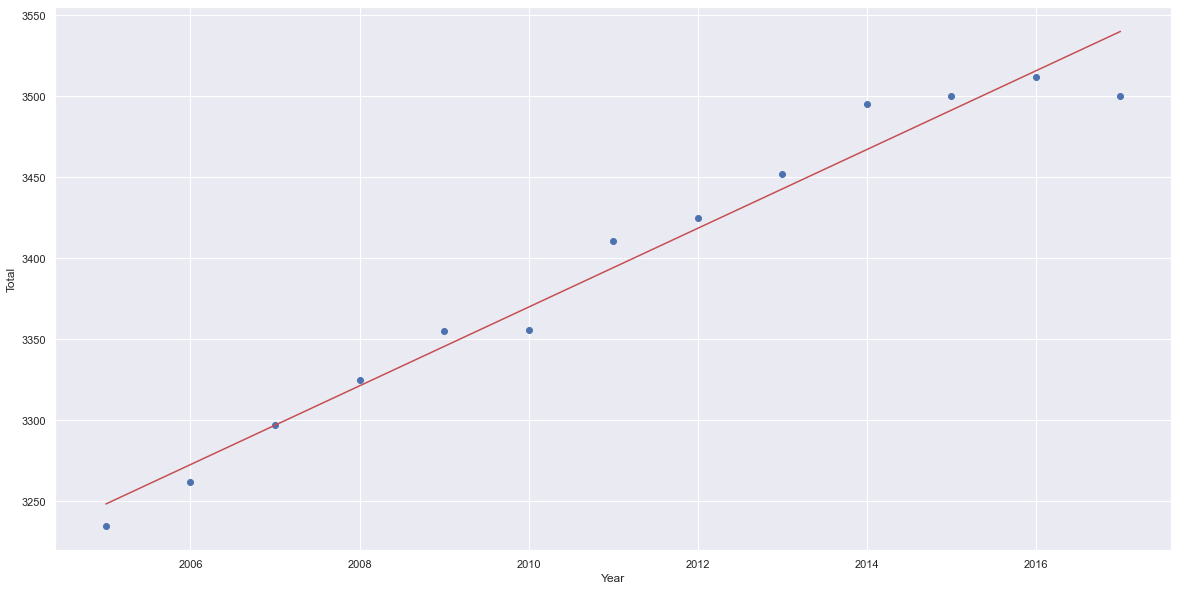

In [232]:
#print data analysis output
print(stockModel.params)
print(stockModel.summary())
x=df8_total['Year']
y=df8_total['Total']
plt.scatter(y=y, x=x)

# best fit line Y = C + M * X
m,c = np.polyfit(x, y, deg=1)
plt.plot(x, c+m*x, 'r-')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()

# Datasets 5 & 6

In [233]:
df9 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(5) traffic-facilities.csv') #import dataset 5
df10 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(6) vehicular-facilities.csv') #import dataset 5

#### Number of null columns before cleaning<br>
#### Dataset 5:

In [234]:
display(df9.isna().sum())

year        0
facility    0
number      0
dtype: int64

#### Number of null columns before cleaning <br>
#### Dataset 6:

In [235]:
display(df10.isna().sum())

year        0
facility    0
number      0
dtype: int64

In [236]:
df9 = df9.rename(columns={'year':'Year','facility':'Type of Facility','number':'Count'}) #rename columns for easier readability
df10 = df10.rename(columns={'year':'Year','facility':'Type of Facility','number':'Count'}) #rename columns for easier readability
df_final = pd.concat([df9,df10]) #concatenate the 2 DataFrames for easier readability
df_final = df_final.sort_values(by=['Year','Count'])
df_final = df_final.reset_index()
df_final = df_final.drop(columns=['index']) #clean final data
display(df_final)

,Year,Type of Facility,Count
0,1994,ERP Gantries,0
1,1994,Vehicular Underpasses & Tunnels,10
2,1994,Flyovers,79
3,1994,Vehicular Bridges,180
4,1994,Traffic Lights,1256
...,...,...,...
115,2017,Vehicular Underpasses & Tunnels,32
116,2017,ERP Gantries,78
117,2017,Flyovers,124
118,2017,Vehicular Bridges,222


### Handling Total Data

In [237]:
total_typeof_keys = (np.unique(df_final["Year"]))
total_typeof_values =[]
for year in np.unique(df_final["Year"]):
    total_typeof_values.append(df_final[df_final["Year"]==year]["Count"].sum())


total_typeof = dict(zip(total_typeof_keys, total_typeof_values))

df_final_total = pd.Series(data=total_typeof, index=np.unique(df_final["Year"])) #make index using np.unique of years
df_final = df_final.set_index(['Year','Type of Facility'])

df_final_total = df_final_total.to_frame().reset_index()
df_final_total = df_final_total.rename(columns={0:'Total','index':'Year'})

df_final.to_csv('./Datasets/Cleaned Data/(5,6) cleaned.csv')
df_final_total.to_csv('./Datasets/Cleaned Data/(5,6) total_cleaned.csv')

display(df_final_total)
#check data fit
stockModel = sm.OLS.from_formula("Total ~ 	Year", data=df_final_total).fit()
stockPredicts = stockModel.predict()




,Year,Total
0,1994,1525
1,1995,1599
2,1996,1675
3,1997,1770
4,1998,1876
5,1999,1980
6,2000,2055
7,2001,2103
8,2002,2160
9,2003,2219


#### 97.8% R<sup>2</sup> value

Intercept   -109627.369565
Year             55.804348
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     964.7
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.15e-19
Time:                        20:23:32   Log-Likelihood:                -131.64
No. Observations:                  24   AIC:                             267.3
Df Residuals:                      22   BIC:                             269.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

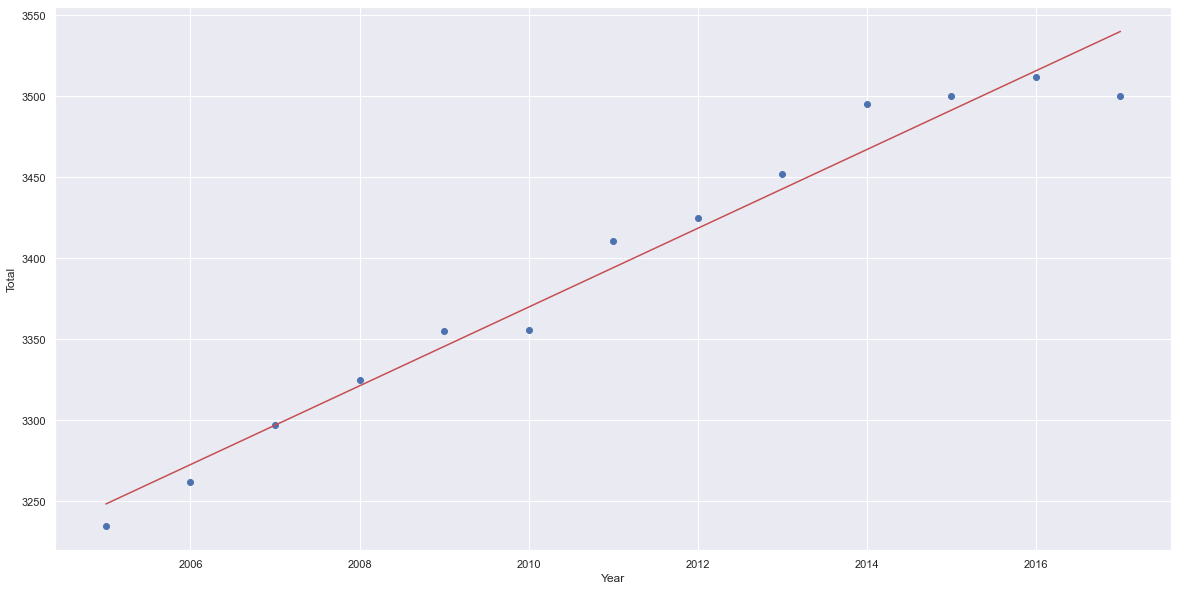

In [238]:
#print data analysis output
print(stockModel.params)
print(stockModel.summary())
x=df8_total['Year']
y=df8_total['Total']
plt.scatter(y=y, x=x)

# best fit line Y = C + M * X
m,c = np.polyfit(x, y, deg=1)
plt.plot(x, c+m*x, 'r-')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()

# Dataset 7

In [239]:
df11 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(7) annual-motor-vehicle-population-by-type-of-fuel-used.csv')

#### Number of null columns before cleaning


In [240]:
display(df11.isna().sum())


year       4
type      12
engine    23
number    11
dtype: int64

In [241]:

df11 = df11.dropna()
df11 = df11.astype({"year": int})
df11 = df11.astype({"number": int})

#### Number of null columns after cleaning


In [242]:
display(df11.isna().sum())
df11 = df11.rename(columns={'year':'Year','engine':'Engine Type','number':'Count'})
df11 = df11.drop(df11[df11['type']!='Cars'].index) # only keep cars
df11 = df11.groupby('Year').head(3)
df11 = df11.drop(['type'], axis=1)
df11 = df11.set_index(['Year','Engine Type'])


year      0
type      0
engine    0
number    0
dtype: int64

In [243]:
df11.to_csv('./Datasets/Cleaned Data/(7) cleaned.csv')
display(df11)

Count
Year Engine Type            
2006 Petrol           471707
     Diesel                7
     Petrol-Electric     379
2007 Petrol           513375
     Diesel                4
     Petrol-Electric    1057
2008 Petrol           545994
     Diesel               17
     Petrol-Electric    1999
2009 Petrol           571629
     Diesel               43
     Petrol-Electric    2637
2010 Petrol           589034
     Diesel              138
     Petrol-Electric    3305
2011 Petrol           596947
     Diesel              346
     Petrol-Electric    3786
2012 Petrol           609792
     Diesel              681
     Petrol-Electric    4684
2013 Petrol           612654
     Diesel             1412
     Petrol-Electric    5020
2014 Petrol           605511
     Diesel             3206
     Petrol-Electric    5727
2015 Petrol           587900
     Diesel             5976
     Petrol-Electric    6371
2016 Petrol           578977
     Diesel            10364
     Petrol-Electric   10075
2017 Petrol           574443
     Diesel            15514
     Petrol-Electric   20751
2018 Petrol           569673
     Diesel            17253
     Petrol-Electric   27179

# Dataset 8

In [244]:
df17 = pd.read_csv(r'./Datasets/(3) Fuel Data/(8) Annual Fuel Data.csv')
df19 = pd.read_csv(r'./Datasets/(3) Fuel Data/(8) Annual Fuel Data Monthly.csv')
df23 = pd.read_csv(r'./Datasets/(3) Fuel Data/(8) Annual Fuel Data Monthly Indexed.csv')

#### Number of null columns before cleaning


In [245]:
display(df17.isna().sum())



Year       0
Average    0
dtype: int64

In [246]:

df17 = df17.dropna()


df17 = df17.astype({"Year": int})
df17 = df17.round({'Average': 2})


#### Number of null columns after cleaning


In [247]:
display(df17.isna().sum())




Year       0
Average    0
dtype: int64

In [248]:
df17.to_csv('./Datasets/Cleaned Data/(8) cleaned.csv')
df19.to_csv('./Datasets/Cleaned Data/(8) monthly cleaned.csv')
display(df17)
display(df19)
monthly_names = list(df23.columns)
del monthly_names[0]
df23 = pd.melt(df23, id_vars='Year', value_vars=monthly_names)
df23['variable'] = pd.Categorical(df23['variable'], categories=monthly_names, ordered=True)
df23 = df23.sort_values(['Year','variable'])
df23 = df23.rename(columns={'variable':'Month'})
display(df23)

df23.to_csv('./Datasets/Cleaned Data/(8) monthly indexed.csv')

,Year,Average
0,1978,0.65
1,1979,0.88
2,1980,1.22
3,1981,1.35
4,1982,1.28
5,1983,1.22
6,1984,1.20
7,1985,1.20
8,1986,0.93
9,1987,0.96


,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978,0.631,0.629,0.629,0.631,0.637,0.645,0.655,0.663,0.669,0.671,0.676,0.685
2,1979,0.695,0.707,0.733,0.780,0.823,0.880,0.930,0.967,0.998,1.006,1.019,1.042
3,1980,1.110,1.186,1.230,1.242,1.244,1.246,1.247,1.243,1.231,1.223,1.222,1.231
4,1981,1.269,1.353,1.388,1.381,1.370,1.362,1.353,1.348,1.358,1.353,1.351,1.348
5,1982,1.341,1.318,1.268,1.210,1.224,1.296,1.318,1.310,1.292,1.280,1.268,1.244
6,1983,1.214,1.170,1.135,1.198,1.243,1.261,1.272,1.269,1.257,1.239,1.224,1.215
7,1984,1.200,1.193,1.194,1.211,1.221,1.214,1.197,1.184,1.189,1.195,1.193,1.179
8,1985,1.145,1.128,1.155,1.199,1.223,1.233,1.233,1.222,1.209,1.198,1.201,1.203
9,1986,1.190,1.119,0.983,0.895,0.927,0.958,0.895,0.848,0.864,0.837,0.827,0.830


,Year,Month,value
0,1978,Jan,0.631
44,1978,Feb,0.629
88,1978,Mar,0.629
132,1978,Apr,0.631
176,1978,May,0.637
...,...,...,...
351,2021,Aug,3.351
395,2021,Sep,3.361
439,2021,Oct,3.477
483,2021,Nov,3.576


C:\Users\justi\AppData\Local\Temp/ipykernel_12216/438648883.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot1.set(xticklabels=[0,1975,1985,1995,2005,2015])


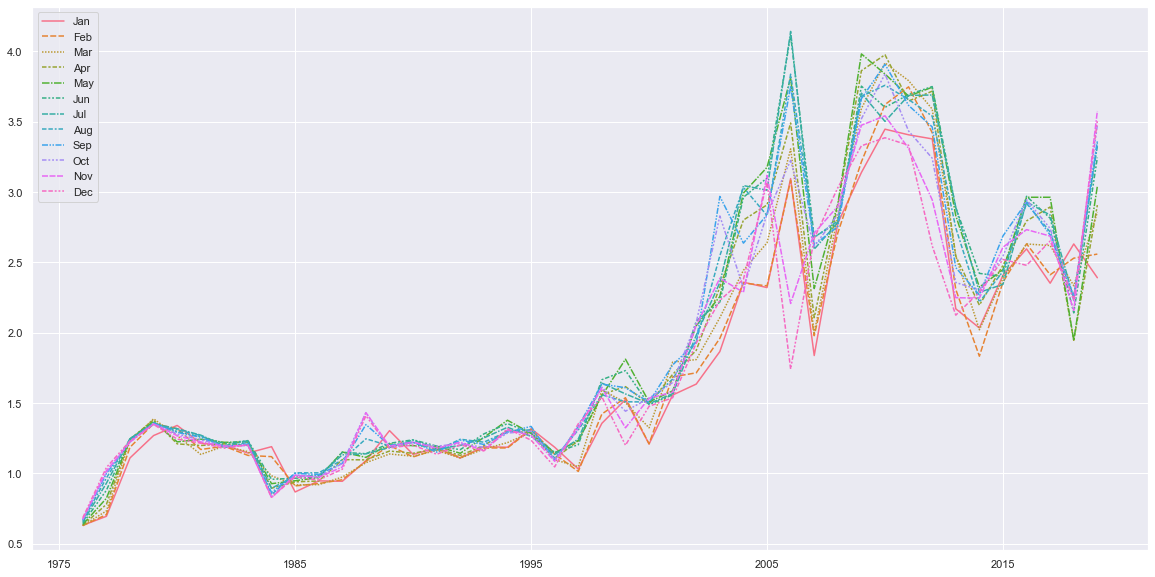

In [249]:
lineplot1 = sns.lineplot(data=df19)
lineplot1.set(xticklabels=[0,1975,1985,1995,2005,2015])
plt.show()

# Dataset 9

In [250]:
df18 = pd.read_csv(r'./Datasets/(3) Fuel Data/(9) 12-Monthly Percentage Change.csv')
df20 = pd.read_csv(r'./Datasets/(3) Fuel Data/(9) Monthly.csv')
df24 = pd.read_csv(r'./Datasets/(3) Fuel Data/(9) Monthly Indexed.csv')

#### Number of null columns before cleaning


In [251]:
display(df18.isna().sum())



Year       0
Average    0
dtype: int64

In [252]:

df18 = df18.dropna()
df18 = df18.astype({"Year": int})
df18 = df18.round({'Average': 2})

#### Number of null columns after cleaning


In [253]:
display(df17.isna().sum())



Year       0
Average    0
dtype: int64

In [254]:
df18.to_csv('./Datasets/Cleaned Data/(9) cleaned.csv')
df20.to_csv('./Datasets/Cleaned Data/(9) monthly cleaned.csv')
display(df18)
display(df20)
monthly_names = list(df24.columns)
del monthly_names[0]
df24 = pd.melt(df24, id_vars='Year', value_vars=monthly_names)
df24['variable'] = pd.Categorical(df24['variable'], categories=monthly_names, ordered=True)
df24 = df24.sort_values(['Year','variable'])
df24 = df24.rename(columns={'variable':'Month'})
display(df24)
df24.to_csv('./Datasets/Cleaned Data/(9) monthly indexed.csv')

,Year,Average
0,1979,34.83
1,1980,41.07
2,1981,10.81
3,1982,-5.24
4,1983,-4.30
5,1984,-2.12
6,1985,-0.13
7,1986,-21.87
8,1987,4.52
9,1988,0.77


,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,10.1,12.4,16.5,23.6,29.2,36.4,42.0,45.9,49.2,49.9,50.7,52.1
2,1980,59.7,67.8,67.8,59.2,51.2,41.6,34.1,28.5,23.3,21.6,19.9,18.1
3,1981,14.3,14.1,12.8,11.2,10.1,9.3,8.5,8.4,10.3,10.6,10.6,9.5
4,1982,5.7,-2.6,-8.6,-12.4,-10.7,-4.8,-2.6,-2.8,-4.9,-5.4,-6.1,-7.7
5,1983,-9.5,-11.2,-10.5,-1.0,1.6,-2.7,-3.5,-3.1,-2.7,-3.2,-3.5,-2.3
6,1984,-1.2,2.0,5.2,1.1,-1.8,-3.7,-5.9,-6.7,-5.4,-3.6,-2.5,-3.0
7,1985,-4.6,-5.4,-3.3,-1.0,0.2,1.6,3.0,3.2,1.7,0.3,0.7,2.0
8,1986,3.9,-0.8,-14.9,-25.4,-24.2,-22.3,-27.4,-30.6,-28.5,-30.1,-31.1,-31.0
9,1987,-27.1,-18.6,-6.6,5.0,2.3,0.8,9.5,18.4,15.7,18.0,19.3,17.5


,Year,Month,value
0,1979,Jan,10.1
43,1979,Feb,12.4
86,1979,Mar,16.5
129,1979,Apr,23.6
172,1979,May,29.2
...,...,...,...
343,2021,Aug,49.3
386,2021,Sep,48.7
429,2021,Oct,56.1
472,2021,Nov,65.6


C:\Users\justi\AppData\Local\Temp/ipykernel_12216/1799807455.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot2.set(xticklabels=[0,1975,1985,1995,2005,2015])


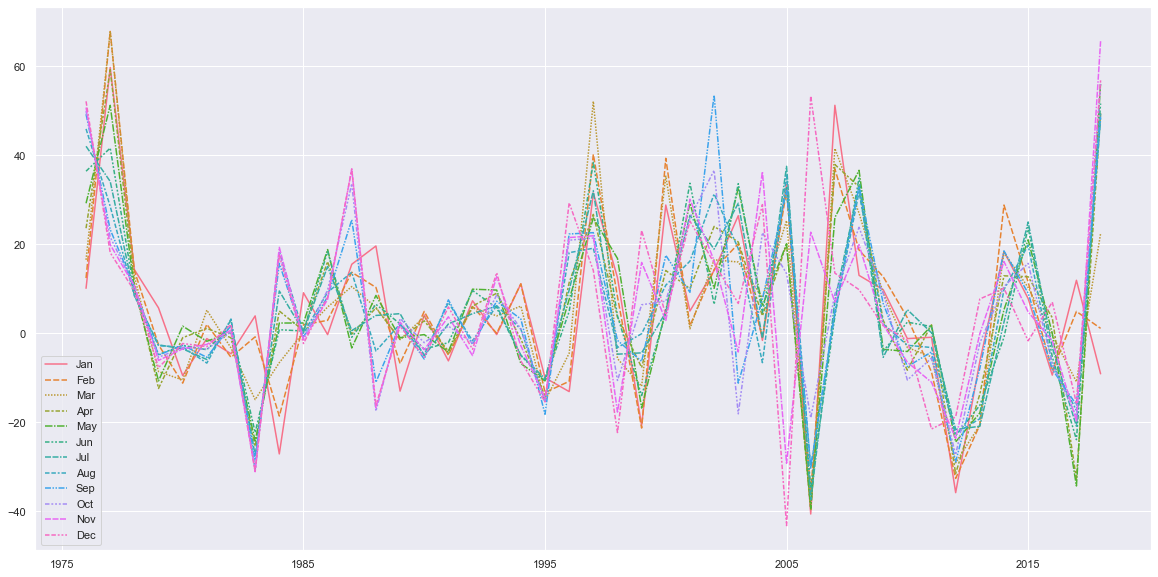

In [255]:

lineplot2 = sns.lineplot(data=df20)
lineplot2.set(xticklabels=[0,1975,1985,1995,2005,2015])
plt.show()

# Dataset 10

In [256]:
df12 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(10) causes-of-accidents-by-severity-of-injury-sustained.csv')


#### Number of null columns before cleaning

In [257]:
display(df12.isna().sum())

year                        0
accident_classification     0
road_user_group            42
causes_of_accident          0
number_of_accidents         6
dtype: int64

In [258]:

df12 = df12.dropna()

#### Number of null columns after cleaning


In [259]:
display(df12.isna().sum())


year                       0
accident_classification    0
road_user_group            0
causes_of_accident         0
number_of_accidents        0
dtype: int64

#### Data before getting rid of outlier data

In [260]:
df_temp = df12.rename(columns={'year':'Year','road_user_group':'Road User Group','causes_of_accident':'Cause of Accident','number_of_accidents':'Number of Accidents'})
df_temp = df_temp.sort_values(by=['Year', 'Number of Accidents'],ascending=False)
df_temp = df_temp.astype({"Number of Accidents": int})
df_temp = df_temp.groupby(['Year','accident_classification']).first() # sort by the year then by the accident fatality
display(df_temp)


Road User Group  \
Year accident_classification                                
2012 FATAL                                    Pedestrians   
     INJURY                   Drivers, Riders or Cyclists   
2013 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2014 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2015 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2016 FATAL                    Drivers, Riders or Cyclists   
     INJURY                                   Pedestrians   
2017 FATAL                                    Pedestrians   
     INJURY                   Drivers, Riders or Cyclists   
2018 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   

                                                              Cause of Accident  \
Year accident_classification                                                      
2012 FATAL                                     Failing to Keep a Proper Lookout   
     INJURY                                    Failing to Keep a Proper Lookout   
2013 FATAL                                     Failing to Keep a Proper Lookout   
     INJURY                                      Under the Influence of Alcohol   
2014 FATAL                                     Failing to Keep a Proper Lookout   
     INJURY                                    Failing to Keep a Proper Lookout   
2015 FATAL                    Disobeying Traffic Light Signals Resulting in ...   
     INJURY                                    Failing to Keep a Proper Lookout   
2016 FATAL                                     Failing to Keep a Proper Lookout   
     INJURY                                      Under the Influence of Alcohol   
2017 FATAL                                       Playing on The Road or Carpark   
     INJURY                                    Failing to Keep a Proper Lookout   
2018 FATAL                                     Failing to Keep a Proper Lookout   
     INJURY                                     Failing to Have Proper Control    

                              Number of Accidents  
Year accident_classification                       
2012 FATAL                                     59  
     INJURY                                  2710  
2013 FATAL                                     53  
     INJURY                                  2398  
2014 FATAL                                     55  
     INJURY                                  2459  
2015 FATAL                                1450000  
     INJURY                                  2592  
2016 FATAL                                     42  
     INJURY                               1300340  
2017 FATAL                                1401740  
     INJURY                                  2076  
2018 FATAL                                     38  
     INJURY                                  1964

In [261]:

z_scores = stats.zscore(df12['number_of_accidents']) #use Z score to find outliers in data
abs_z_scores = np.abs(z_scores).to_frame()
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_keys = filtered_entries[filtered_entries==False].keys()
print('Outliers Detected: ')
for key in df_keys:
    print(f"Outlier: {int(df12.loc[key,'number_of_accidents'])} number of accidents at Index: {key}")

Outliers Detected: 
Outlier: 1450000 number of accidents at Index: 168
Outlier: 1300340 number of accidents at Index: 214
Outlier: 1401740 number of accidents at Index: 270


#### Data after getting rid of outlier data

Road User Group  \
Year accident_classification                                
2012 FATAL                                    Pedestrians   
     INJURY                   Drivers, Riders or Cyclists   
2013 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2014 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2015 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2016 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2017 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   
2018 FATAL                    Drivers, Riders or Cyclists   
     INJURY                   Drivers, Riders or Cyclists   

                                             Cause of Accident  \
Year accident_classification                                     
2012 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                   Failing to Keep a Proper Lookout   
2013 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                     Under the Influence of Alcohol   
2014 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                   Failing to Keep a Proper Lookout   
2015 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                   Failing to Keep a Proper Lookout   
2016 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                   Failing to Keep a Proper Lookout   
2017 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                   Failing to Keep a Proper Lookout   
2018 FATAL                    Failing to Keep a Proper Lookout   
     INJURY                    Failing to Have Proper Control    

                              Number of Accidents  
Year accident_classification                       
2012 FATAL                                     59  
     INJURY                                  2710  
2013 FATAL                                     53  
     INJURY                                  2398  
2014 FATAL                                     55  
     INJURY                                  2459  
2015 FATAL                                     58  
     INJURY                                  2592  
2016 FATAL                                     42  
     INJURY                                  2742  
2017 FATAL                                     32  
     INJURY                                  2076  
2018 FATAL                                     38  
     INJURY                                  1964

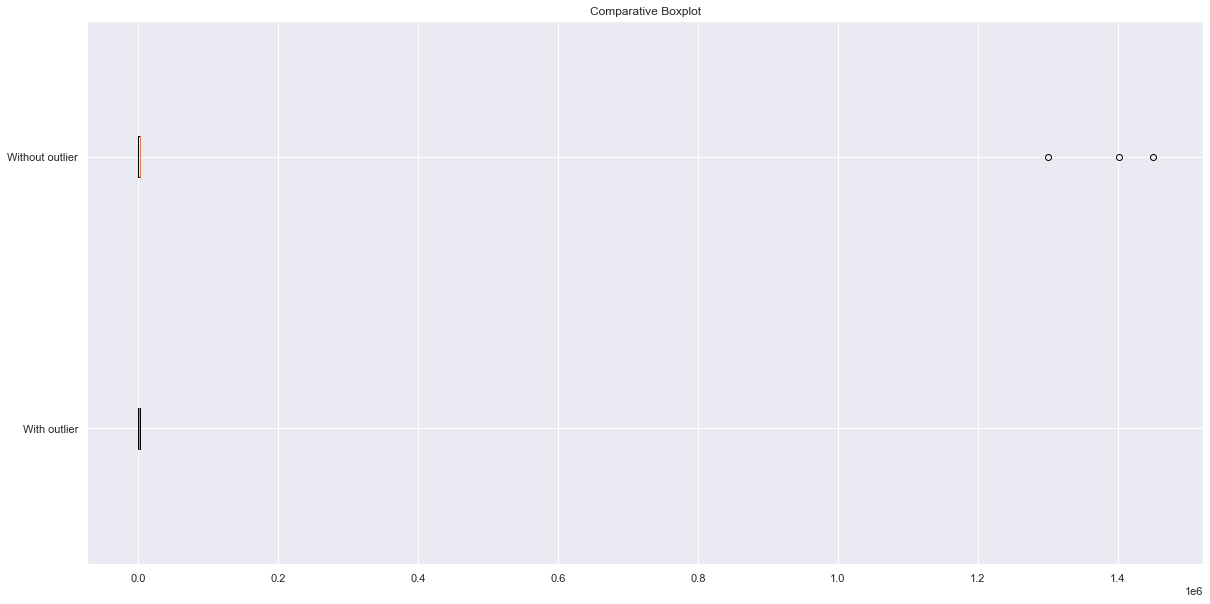

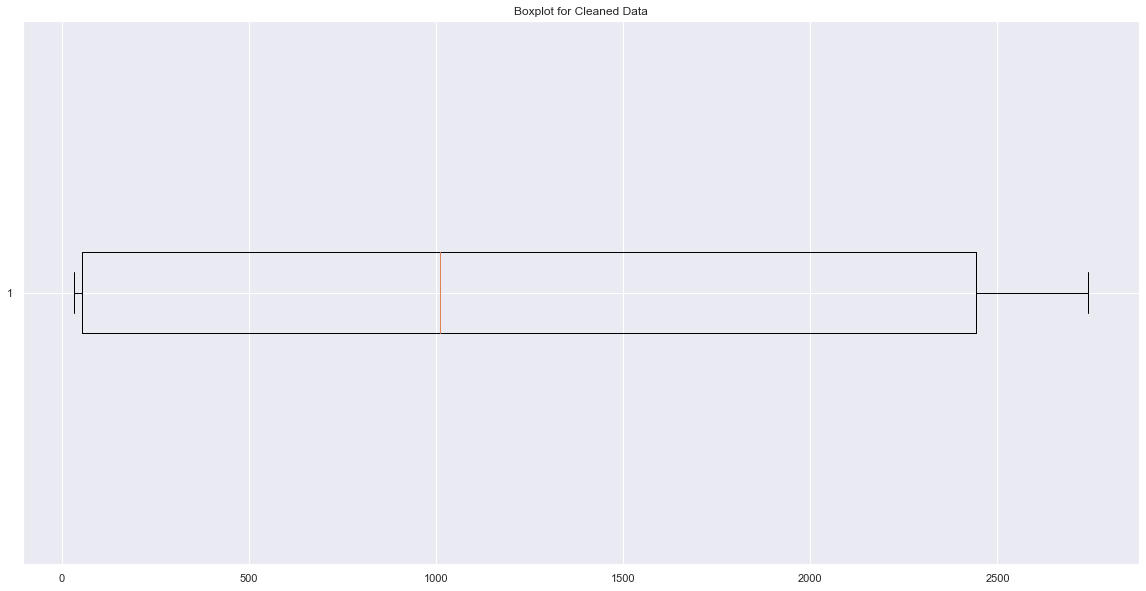

In [262]:
df12 = df12[filtered_entries]

df12 = df12.rename(columns={'year':'Year','road_user_group':'Road User Group','causes_of_accident':'Cause of Accident','number_of_accidents':'Number of Accidents'})
df12 = df12.sort_values(by=['Year', 'Number of Accidents'],ascending=False)
df12 = df12.astype({"Number of Accidents": int})
df12 = df12.groupby(['Year','accident_classification']).first() # sort by the year then by the accident fatality
display(df12)
df12.to_csv('./Datasets/Cleaned Data/(10) cleaned.csv')

comb_data = [df12['Number of Accidents'],df_temp['Number of Accidents'],]
fig2, ax2 = plt.subplots()
ax2.set_title('Comparative Boxplot')
plt.show(ax2.boxplot(comb_data,vert=False,labels=('With outlier', 'Without outlier')))

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot for Cleaned Data')
plt.show(ax1.boxplot(df12['Number of Accidents'], vert=False))

# Dataset 11

In [263]:
df13 = pd.read_csv(r'./Datasets/(2) road-traffic-conditions/(11) Average Insurance Cost per Age Group.csv')


#### Number of null columns before cleaning

In [264]:
display(df13.isna().sum())

Driver's Age    0
Sex             0
Average Cost    0
dtype: int64

In [265]:
display(df13)
df13.to_csv('./Datasets/Cleaned Data/(11) cleaned.csv')

,Driver's Age,Sex,Average Cost
0,20,Male,2247
1,20,Female,2083
2,30,Male,1692
3,30,Female,1646
4,40,Male,1596
5,40,Female,1576
6,50,Male,1684
7,50,Female,1692
8,60,Male,1710
9,60,Female,1748


<AxesSubplot:xlabel="Driver's Age", ylabel='Average Cost'>

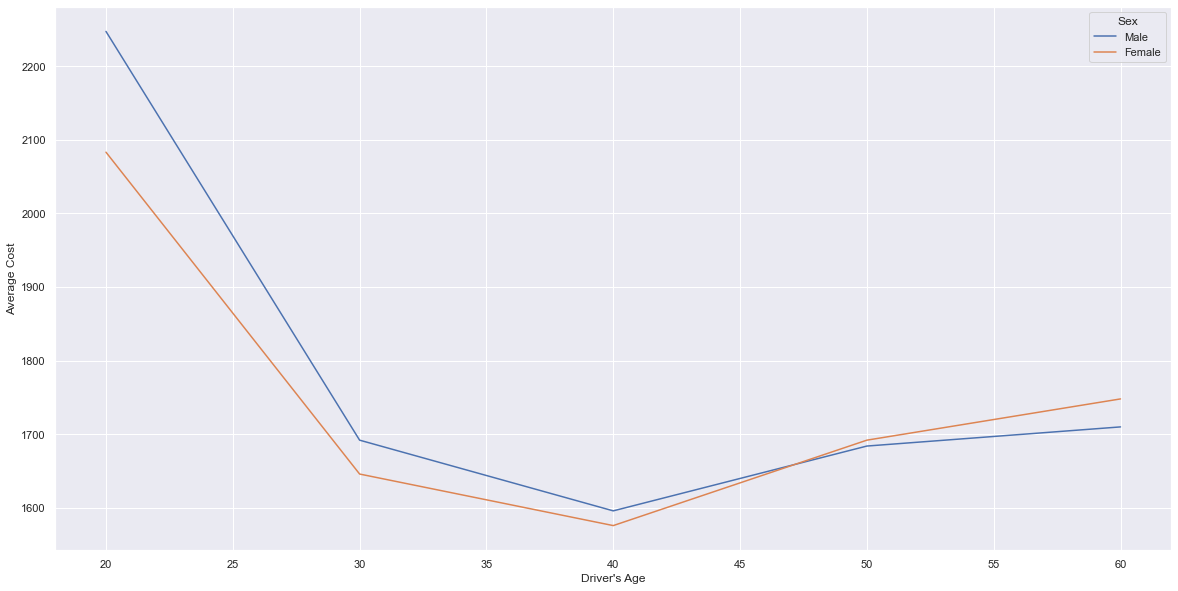

In [266]:

sns.lineplot(data=df13, x="Driver's Age", y="Average Cost", hue="Sex")

# Dataset 12

In [267]:
url = 'https://api.data.gov.sg/v1/transport/carpark-availability'
r = requests.get(url)
r = r.json()
carpark_info_arr = []

for info in r['items'][0]['carpark_data']:
    carpark_info_arr.append(info['carpark_info'][0])

df15 = pd.DataFrame(carpark_info_arr)
df15 = df15.drop('lot_type', axis=1)
display(df15)
df15 = df15.astype({"total_lots": int,'lots_available':int})


#check data fit
stockModel = sm.OLS.from_formula("total_lots ~ 	lots_available", data=df15).fit()
stockPredicts = stockModel.predict()


,total_lots,lots_available
0,105,27
1,583,354
2,329,148
3,97,48
4,96,55
...,...,...
1958,665,444
1959,6,0
1960,306,106
1961,195,111


#### Over-fitted data

Intercept         121.272395
lots_available      1.253360
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             total_lots   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:23:35   Log-Likelihood:                -12219.
No. Observations:                1963   AIC:                         2.444e+04
Df Residuals:                    1961   BIC:                         2.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

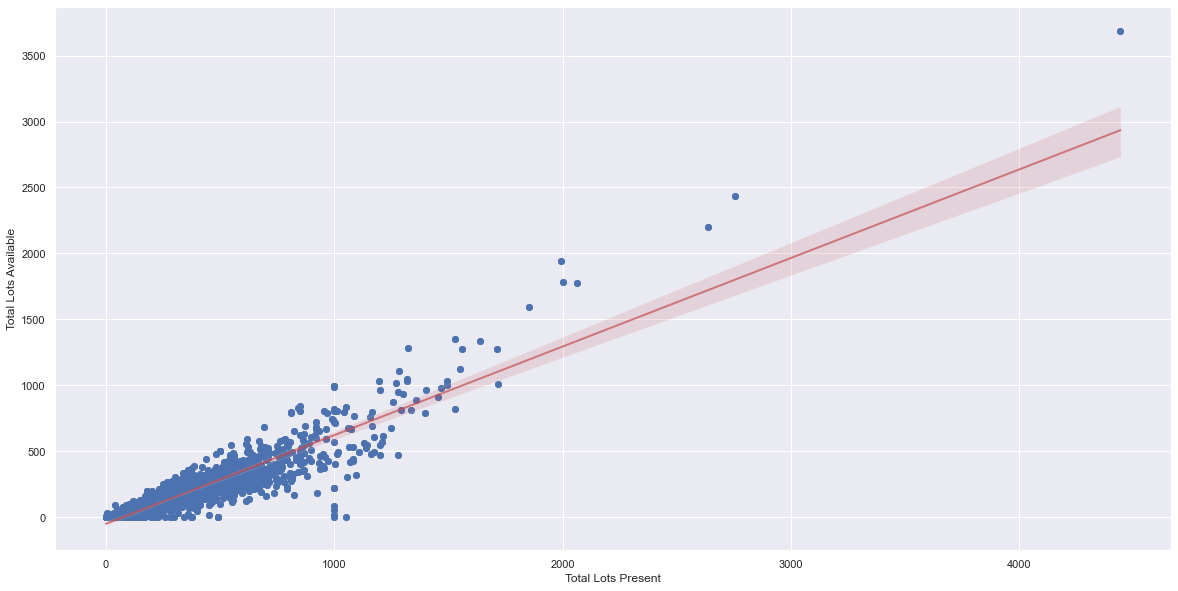

In [268]:
#print data analysis output
print(stockModel.params)
print(stockModel.summary())
x=df15['total_lots']
y=df15['lots_available']
plt.scatter(y=y, x=x)

# best fit line Y = C + M * X
sns.regplot(x=df15["total_lots"], y=df15["lots_available"], line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Total Lots Present')
plt.ylabel('Total Lots Available')
plt.show()

#### Post-Processed data

In [269]:
#recheck data for outliers
z_scores = stats.zscore(df15['total_lots']) #use Z score to find outliers in data
abs_z_scores = np.abs(z_scores).to_frame()
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_keys = filtered_entries[filtered_entries==False].keys()
print('Outliers Detected: ')
for key in df_keys:
    print(f"Outlier: {int(df15.loc[key,'total_lots'])} number of lots at Index: {key}")

Outliers Detected: 
Outlier: 1318 number of lots at Index: 359
Outlier: 1302 number of lots at Index: 525
Outlier: 4443 number of lots at Index: 529
Outlier: 1401 number of lots at Index: 559
Outlier: 1549 number of lots at Index: 564
Outlier: 1454 number of lots at Index: 569
Outlier: 1336 number of lots at Index: 576
Outlier: 1358 number of lots at Index: 656
Outlier: 2064 number of lots at Index: 664
Outlier: 1294 number of lots at Index: 835
Outlier: 1561 number of lots at Index: 845
Outlier: 1854 number of lots at Index: 958
Outlier: 1399 number of lots at Index: 973
Outlier: 1530 number of lots at Index: 1349
Outlier: 2637 number of lots at Index: 1392
Outlier: 1494 number of lots at Index: 1432
Outlier: 1318 number of lots at Index: 1500
Outlier: 1719 number of lots at Index: 1549
Outlier: 1640 number of lots at Index: 1596
Outlier: 1325 number of lots at Index: 1661
Outlier: 1494 number of lots at Index: 1702
Outlier: 1712 number of lots at Index: 1718
Outlier: 1530 number of l

Intercept         106.212952
lots_available      1.341424
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             total_lots   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     6818.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:23:36   Log-Likelihood:                -11991.
No. Observations:                1936   AIC:                         2.399e+04
Df Residuals:                    1934   BIC:                         2.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

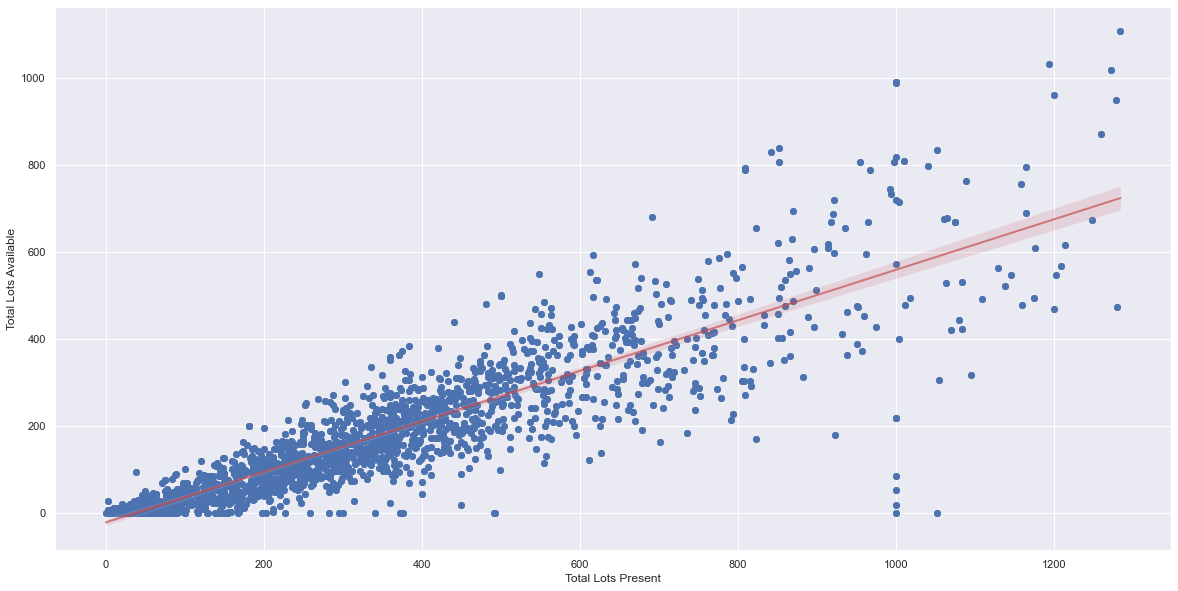

,total_lots,lots_available
0,105,27
1,583,354
2,329,148
3,97,48
4,96,55
...,...,...
1958,665,444
1959,6,0
1960,306,106
1961,195,111


In [270]:


#reassess and re-plot data
df16 = df15[filtered_entries]
stockModel = sm.OLS.from_formula("total_lots ~ 	lots_available", data=df16).fit()
stockPredicts = stockModel.predict()
print(stockModel.params)
print(stockModel.summary())
x=df16['total_lots']
y=df16['lots_available']
plt.scatter(y=y, x=x)

# best fit line Y = C + M * X
sns.regplot(x=df16["total_lots"], y=df16["lots_available"], line_kws={"color":"r","alpha":0.7,"lw":2})
plt.xlabel('Total Lots Present')
plt.ylabel('Total Lots Available')
plt.show()
display(df16)
df16.to_csv('./Datasets/Cleaned Data/(12) cleaned.csv')

# Dataset 13

In [271]:
df18 = pd.read_csv(r'./Datasets/(4) hdb-carpark-information/(13) hdb-carpark-information.csv')


#### Number of null columns before cleaning

In [272]:
display(df18.isna().sum())

car_park_no               54
address                   68
x_coord                    0
y_coord                    0
car_park_type             20
type_of_parking_system    22
short_term_parking        15
free_parking               0
night_parking             11
car_park_decks            29
gantry_height             17
car_park_basement          0
dtype: int64

In [273]:

df18 = df18.fillna(method="ffill") #carparks are arranged geographically, hence it makes more sense to
                                   #forward fill them with the surrounding carpark data

#### Number of null columns after cleaning


car_park_no               0
address                   0
x_coord                   0
y_coord                   0
car_park_type             0
type_of_parking_system    0
short_term_parking        0
free_parking              0
night_parking             0
car_park_decks            0
gantry_height             0
car_park_basement         0
dtype: int64

,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement
0,30314.7936,31490.4942,BASEMENT CAR PARK,ELECTRONIC PARKING,WHOLE DAY,NO,YES,1.0,1.80,Y
1,33758.4143,33695.5198,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,5.0,2.10,N
2,29257.7203,34500.3599,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0.0,0.00,N
3,28185.4359,39012.6664,SURFACE CAR PARK,COUPON PARKING,7AM-7PM,NO,NO,0.0,0.00,N
4,29482.0290,38684.1754,SURFACE CAR PARK,COUPON PARKING,NO,NO,NO,0.0,0.00,N
...,...,...,...,...,...,...,...,...,...,...
2166,29850.1522,45576.0125,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,10.0,2.15,N
2167,30057.2209,45166.4820,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,4.0,2.15,N
2168,27772.9219,45686.2734,SURFACE CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,0.0,4.50,N
2169,29935.5818,45679.7181,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,WHOLE DAY,SUN & PH FR 7AM-10.30PM,YES,11.0,2.15,N


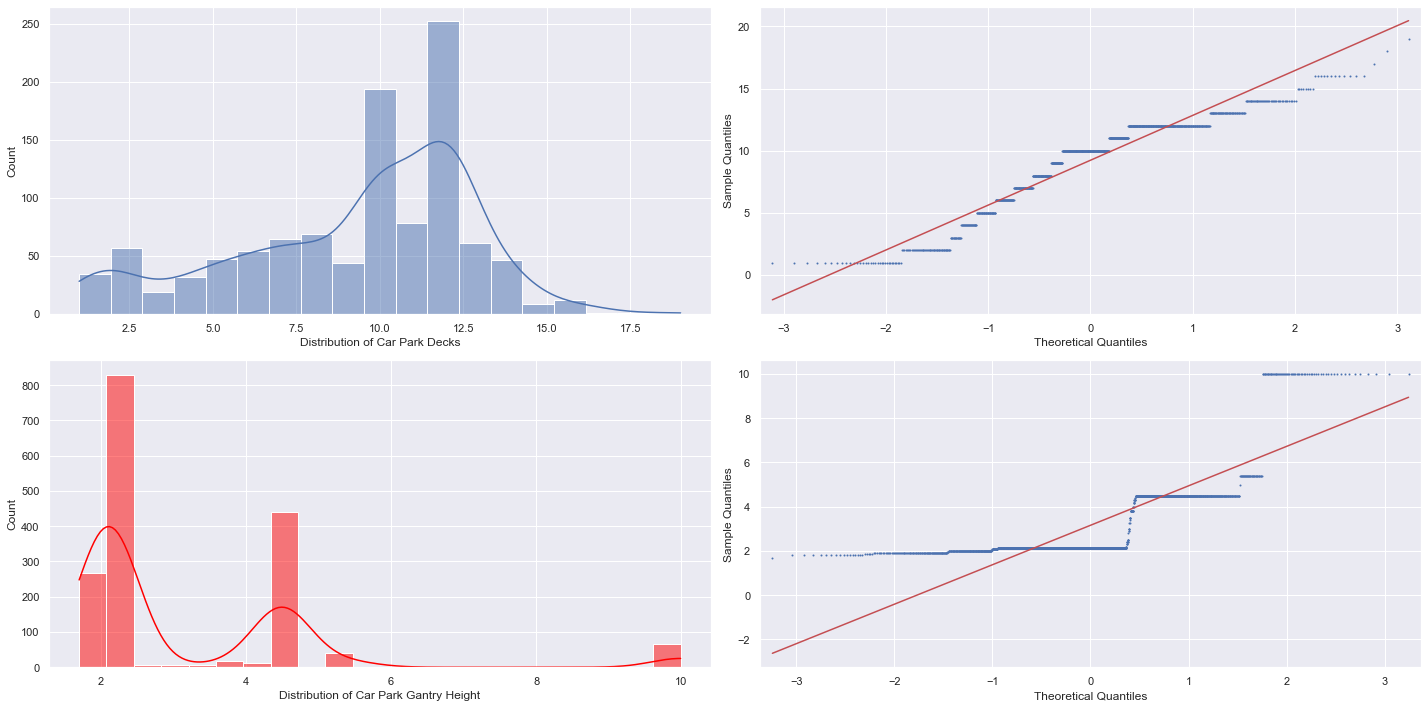

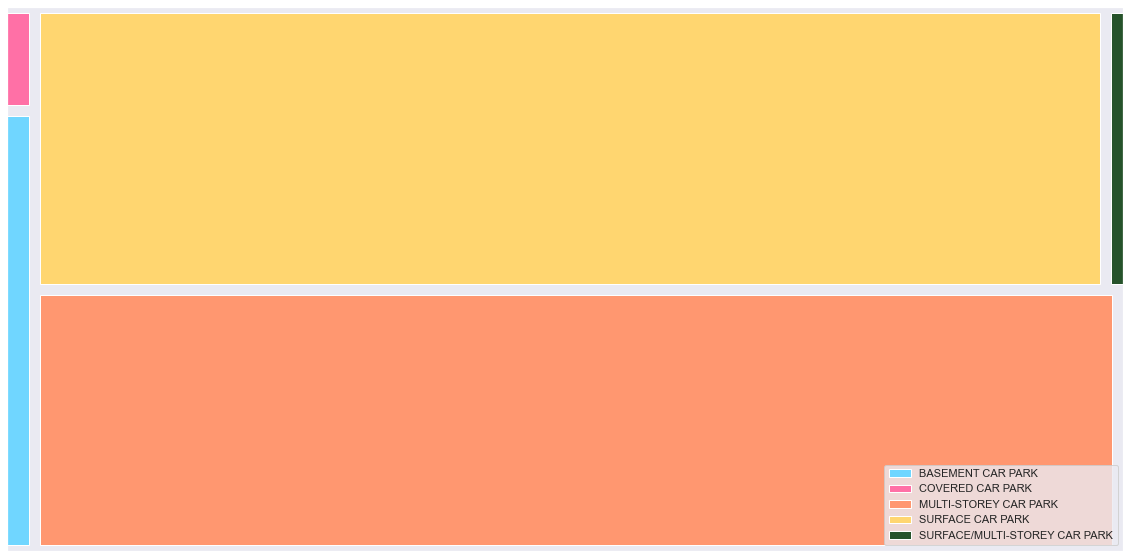

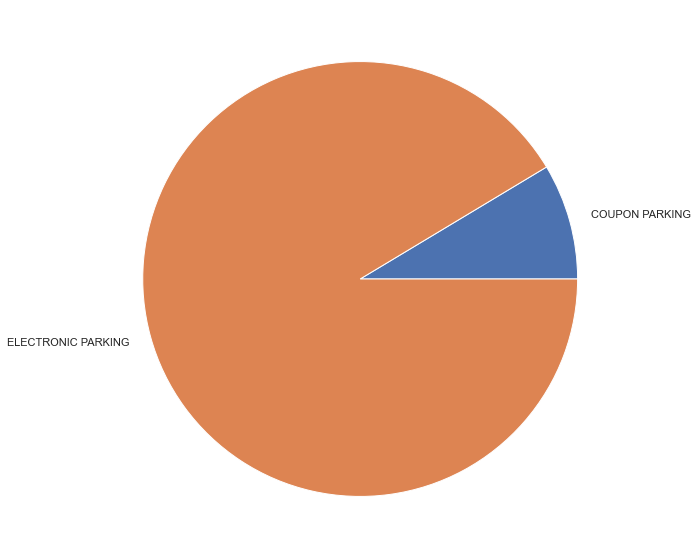

In [274]:
display(df18.isna().sum())

df18 = df18.drop(['car_park_no','address'],axis=1)
df18_levels = df18[df18.car_park_decks>0]
df18_gantry = df18[df18.gantry_height>0]
display(df18)

fig, axs = plt.subplots(2,2)
histplot1 = sns.histplot(ax=axs[0,0],data=df18_levels['car_park_decks'],kde=True) #distribution of levels where levels > 0
smplot1 = sm.qqplot(df18_levels['car_park_decks'],ax=axs[0,1],line='s',markersize=1)
histplot2 = sns.histplot(data=df18_gantry['gantry_height'],kde=True,color='red',ax=axs[1,0]) #distribution of gantry height where levels > 0
smplot2 = sm.qqplot(df18_gantry['gantry_height'],ax=axs[1,1],line='s',markersize=1)
histplot1.set_xlabel('Distribution of Car Park Decks')
histplot2.set_xlabel('Distribution of Car Park Gantry Height')
fig.tight_layout()
plt.show()
df18.to_csv('./Datasets/Cleaned Data/(13) cleaned.csv')

carpark_pie ={}
parking_type_pie = {}
for carpark_type in np.unique(df18['car_park_type']):
    carpark_pie[carpark_type] = df18['car_park_type'].value_counts()[carpark_type]

for parking_type in np.unique(df18['type_of_parking_system']):
    parking_type_pie[parking_type] = df18['type_of_parking_system'].value_counts()[parking_type]

# Data to plot
labels = []
sizes = []

for x, y in carpark_pie.items():
    labels.append(x)
    sizes.append(y)

# Data to plot
labels1 = []
sizes1 = []

for x, y in parking_type_pie.items():
    labels1.append(x)
    sizes1.append(y)

#data cleaning
labels.remove('MECHANISED AND SURFACE CAR PARK')
labels.remove('MECHANISED CAR PARK')
sizes.remove(2)
sizes.remove(1)

# Plot
tree_frame_df = pd.DataFrame({'sizes':sizes,'labels':labels})
colors=['#70D6FF','#FF70A6','#FF9770','#FFD670','#26532B']
g = squarify.plot(sizes=tree_frame_df['sizes'], alpha=1, color=colors,pad=True)
plt.legend(handles=g.containers[0], labels=labels)
g.get_xaxis().set_visible(False)
g.get_yaxis().set_visible(False)
plt.show()

#plot
plt.pie(x=sizes1,labels=labels1)
plt.show()